# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [2]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step1. 下載資料

In [3]:
breast_cancer=datasets.load_breast_cancer()

In [4]:
print(breast_cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
feature=breast_cancer.data
target=breast_cancer.target
print(breast_cancer.feature_names)
print(breast_cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [7]:
feature.shape

(569, 30)

In [8]:
target.shape

(569,)

In [9]:
target_names=breast_cancer.target_names
target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
labels=target_names[target] 
labels.shape

(569,)

## Step2. 區分訓練集與測試集

In [11]:
# Select the data we would like to analyze
malignant_mean_radius = feature[labels=='malignant',0]
malignant_mean_texture = feature[labels=='malignant',1]
malignant=np.c_[malignant_mean_radius,malignant_mean_texture]

In [12]:
benign_mean_radius = feature[labels=='benign',0]
benign_mean_texture = feature[labels=='benign',1]
benign = np.c_[benign_mean_radius,benign_mean_texture]

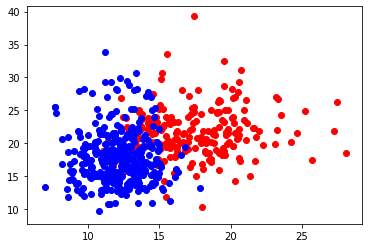

In [13]:
# Plot the figure 
plt.scatter(malignant[:,0],malignant[:,1],color='red')
plt.scatter(benign[:,0],benign[:,1],color='blue')

In [14]:
# Combine the selected data 
training_data=np.r_[malignant, benign]
training_labels=np.r_[np.zeros(len(malignant)),np.ones(len(benign))]
print(training_data.shape)
print(training_labels.shape)

(569, 2)
(569,)


In [15]:
# Seperate the data 
X_train, X_test, y_train, y_test = train_test_split(training_data, training_labels,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)

(398, 2)
(398,)


## Step3. 建模

In [16]:
# Train the data to build the model 
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step4. 預測

```

```


In [17]:
# Use the trained model and test data to predict the result 
clf.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1.])

## Step5. 準確度分析

In [18]:
# Quantify the results 
print(clf.score(X_train,y_train)) # Score = the correct result / all corresponding result 
print(clf.score(X_test, y_test))

0.9095477386934674
0.8888888888888888
